# Lab 2

### Loading the Titanic dataset

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [12]:
# Descriptive statistics (only numeric columns)
desc_stats = titanic.describe()
print("Descriptive Statistics:\n", desc_stats)

# Median
medians = titanic.median(numeric_only=True)
print("\nMedian:\n", medians)

# Mode (could return multiple rows if multimodal)
modes = titanic.mode(numeric_only=True)
print("\nMode:\n", modes)


Descriptive Statistics:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Median:
 survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

Mode:
    survived  pclass   age  sibsp  parch  fare  adult_male  alone

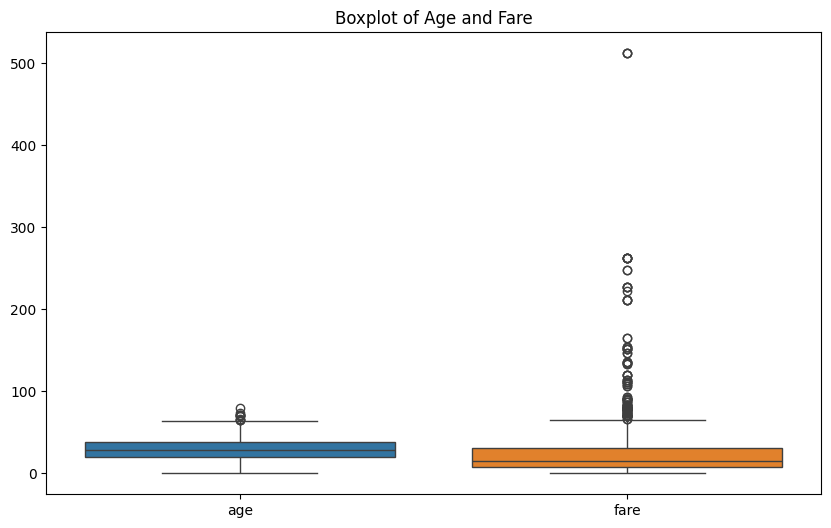

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic[['age', 'fare']])
plt.title("Boxplot of Age and Fare")
plt.show()


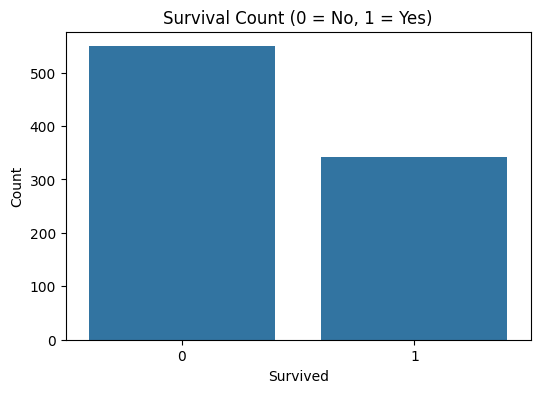

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


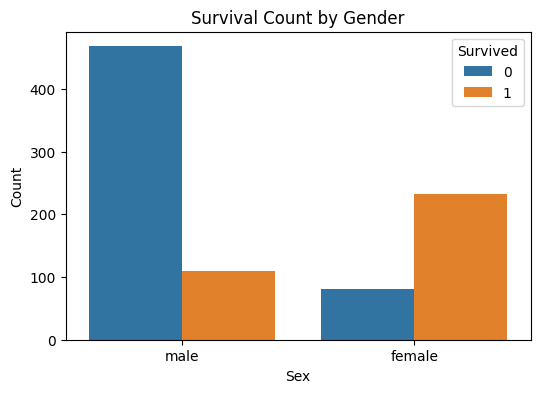

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


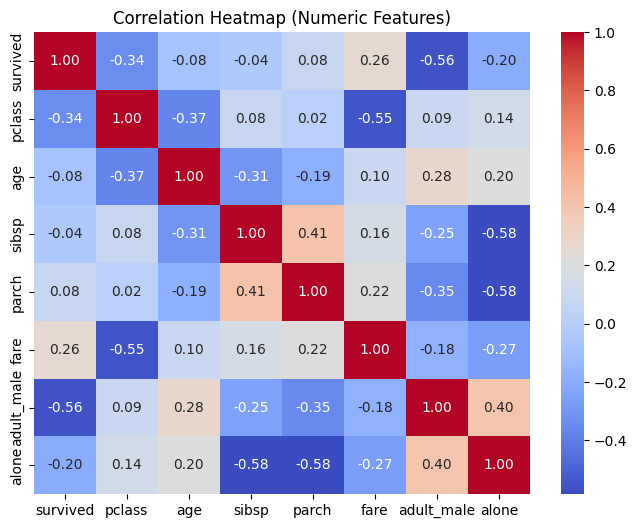

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# Lab 3

In [ ]:
# Check missing values
print(titanic.isnull().sum())  

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [18]:
# Imputation Techniques for Missing Values
# Impute 'age' with median (numerical feature)
titanic['age']=titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Impute 'embarked' with mode (categorical feature)
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values (e.g., 'deck')
titanic['deck']=titanic.drop(columns=['deck'], inplace=True)


C:\Users\anils\AppData\Local\Temp\ipykernel_15476\2412570472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age']=titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\anils\AppData\Local\Temp\ipykernel_15476\2412570472.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [19]:
# Feature encoding
# label encoding for binary categorical feature(sex)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])  # male = 1, female = 0

 #One-Hot Encoding for Multiclass Categorical Features (embarked, class, who)

titanic = pd.get_dummies(titanic, columns=['embarked', 'class', 'who'], drop_first=True)


In [21]:
# normalization
from sklearn.preprocessing import StandardScaler

# Select numeric features only
num_cols = titanic.select_dtypes(include=['float64', 'int64']).columns

# Apply standardization
scaler = StandardScaler()
titanic[num_cols] = scaler.fit_transform(titanic[num_cols])


In [22]:
titanic.sample(15)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,deck,class_Second,class_Third,who_man,who_woman
458,1.266990,-0.369365,-1.355574,None,-0.474545,-0.473674,-0.437007,False,Southampton,yes,True,None,True,False,False,True
399,1.266990,-0.369365,-1.355574,None,-0.474545,-0.473674,-0.393718,False,Southampton,yes,True,None,True,False,False,True
721,-0.789272,0.827377,0.737695,None,0.432793,-0.473674,-0.506388,True,Southampton,no,False,None,False,True,True,False
573,1.266990,0.827377,-1.355574,None,-0.474545,-0.473674,-0.492378,False,Queenstown,yes,True,None,False,True,False,True
26,-0.789272,0.827377,0.737695,None,-0.474545,-0.473674,-0.502949,True,Cherbourg,no,True,None,False,True,True,False
163,-0.789272,0.827377,0.737695,None,-0.474545,-0.473674,-0.474005,True,Southampton,no,True,None,False,True,True,False
374,-0.789272,0.827377,-1.355574,None,2.247470,0.767630,-0.224083,False,Southampton,no,False,None,False,True,False,False
874,1.266990,-0.369365,-1.355574,None,0.432793,-0.473674,-0.165189,False,Cherbourg,yes,False,None,True,False,False,True
145,-0.789272,-0.369365,0.737695,None,0.432793,0.767630,0.091528,True,Southampton,no,False,None,True,False,True,False
580,1.266990,-0.369365,-1.355574,None,0.432793,0.767630,-0.044381,False,Southampton,yes,False,None,True,False,False,True


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Drop non-numeric or identifier columns you don't want
df_pca = titanic.drop(columns=['alive', 'embark_town'], errors='ignore')

# Optional: select only numeric columns explicitly (this avoids non-numeric errors)
df_pca = df_pca.select_dtypes(include=['number'])

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df_pca_imputed = imputer.fit_transform(df_pca)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca_imputed)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print(pca_df.head())


        PC1       PC2
0 -1.391339  0.503683
1  2.244977 -0.891397
2  0.420296 -0.397322
3  2.065350 -0.860547
4 -1.548900 -0.086684


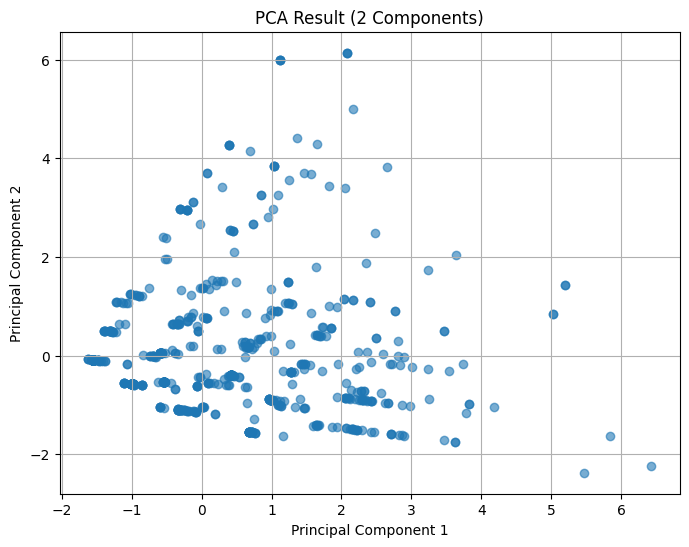

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Lab 5